In [44]:
import pandas as pd
df = pd.read_csv("/Users/mac/Desktop/amore/STUDY-DATA/first_week/data_csv/인구데이터성별.csv", encoding="utf-8")

In [45]:
print(df.columns)
df.head()

Index(['행정구역(시군구)별', '성별', '연령별', '2024'], dtype='object')


,행정구역(시군구)별,성별,연령별,2024
0,전국,계,계,51037252.5
1,전국,계,0세,230638.0
2,전국,계,1세,243965.5
3,전국,계,2세,260580.5
4,전국,계,3세,273215.0


In [46]:
df = df.rename(columns={"행정구역(시군구)별": "region", "성별": "sex", "연령별": "age", "2024": "pop"})

In [47]:
df["pop"] = pd.to_numeric(df["pop"], errors="coerce")

In [48]:
df_age_numeric = df[df["age"].str.match(r"^\d+세$")].copy()
df_age_numeric["age_num"] = df_age_numeric["age"].str.replace("세", "").astype(int)

In [49]:
df_fem_2034 = df_age_numeric[(df_age_numeric["sex"] == "여자") &(df_age_numeric["age_num"].between(20, 34))]

In [50]:
total_fem_2034 = df_fem_2034["pop"].sum()
total_fem_2034

np.float64(9048521.0)

### 지역별 여성수 반올림

In [51]:
region_2034 = (df_fem_2034.groupby("region")["pop"].sum().sort_values(ascending=False).head(10))
region_2034 = region_2034.round()
region_2034

region
전국       4524260.0
경기도      1241740.0
서울특별시    1090446.0
부산광역시     276563.0
인천광역시     275676.0
경상남도      215762.0
대구광역시     198160.0
경상북도      159982.0
충청남도      154583.0
대전광역시     140667.0
Name: pop, dtype: float64

#### TOP 10 지역의 비중 계산하기

In [52]:
region_2034_pct = (region_2034 / total_fem_2034 * 100).round(2)
region_2034_pct

region
전국       50.00
경기도      13.72
서울특별시    12.05
부산광역시     3.06
인천광역시     3.05
경상남도      2.38
대구광역시     2.19
경상북도      1.77
충청남도      1.71
대전광역시     1.55
Name: pop, dtype: float64

#### 수도권 집중도 계산

In [53]:
metro = ["서울특별시", "경기도", "인천광역시"]
metro_total = region_2034[region_2034.index.isin(metro)].sum()
metro_ratio = (metro_total / total_fem_2034 * 100).round(2)
metro_total, metro_ratio

(np.float64(2607862.0), np.float64(28.82))

#### 지역별 순위표 만들기

In [54]:
region_rank = df_fem_2034.groupby("region")["pop"].sum().sort_values(ascending=False)
region_rank

region
전국         4524260.5
경기도        1241739.5
서울특별시      1090446.0
부산광역시       276563.0
인천광역시       275675.5
경상남도        215762.5
대구광역시       198159.5
경상북도        159982.5
충청남도        154583.0
대전광역시       140667.0
광주광역시       132215.5
전북특별자치도     126213.5
충청북도        121865.0
전라남도        115859.5
강원특별자치도     107306.0
울산광역시        82225.5
제주특별자치도      52649.0
세종특별자치시      32348.0
Name: pop, dtype: float64

In [55]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
fontprop = fm.FontProperties(fname=font_path)

plt.rcParams["font.family"] = fontprop.get_name()
plt.rcParams["axes.unicode_minus"] = False

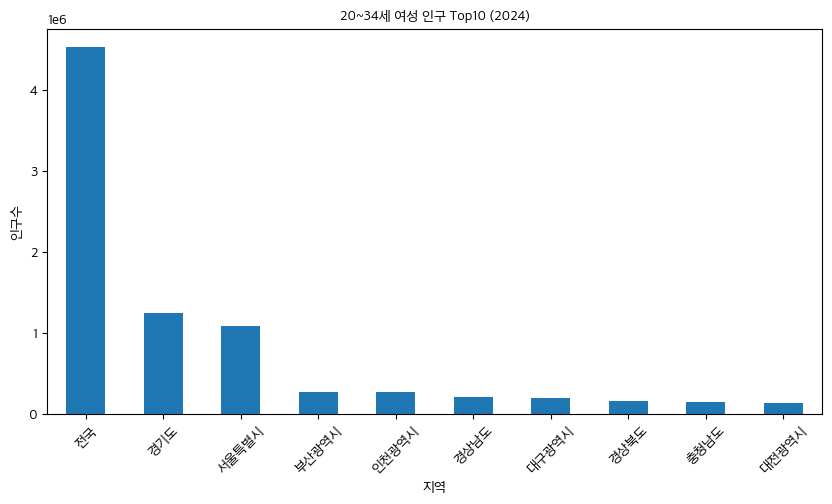

In [56]:
region_2034.plot(kind='bar', figsize=(10,5))
plt.xticks(rotation=45)
plt.title("20~34세 여성 인구 Top10 (2024)", fontproperties=fontprop)
plt.ylabel("인구수", fontproperties=fontprop)
plt.xlabel("지역", fontproperties=fontprop)
plt.show()

#### 지역 전체 인구 대비 20–34세 여성 비중

In [58]:
# 전체 인구
df_total = df[df["sex"]=="계"]
# 전체 중 20-34 연령대
df_total_2034 = df_age_numeric[
    (df_age_numeric["sex"]=="계") &
    (df_age_numeric["age_num"].between(20,34))
].groupby("region")["pop"].sum()
# 여성 2034 인구 대비 비율
ratio = (region_2034 / df_total_2034 * 100).sort_values(ascending=False)
ratio.head(10)

region
서울특별시    51.663096
부산광역시    48.499744
인천광역시    48.010742
전국       47.691019
대전광역시    47.384244
경기도      47.375516
대구광역시    47.018291
충청남도     44.544371
경상남도     44.478481
경상북도     43.285056
Name: pop, dtype: float64

#### 연령 구간별 (20–24 / 25–29 / 30–34) 지역별 분포

In [59]:
age20 = df_age_numeric[(df_age_numeric["sex"]=="여자")&(df_age_numeric["age_num"].between(20,24))]
age25 = df_age_numeric[(df_age_numeric["sex"]=="여자")&(df_age_numeric["age_num"].between(25,29))]
age30 = df_age_numeric[(df_age_numeric["sex"]=="여자")&(df_age_numeric["age_num"].between(30,34))]

pd.DataFrame({
    "20-24": age20.groupby("region")["pop"].sum(),
    "25-29": age25.groupby("region")["pop"].sum(),
    "30-34": age30.groupby("region")["pop"].sum()
}).fillna(0)

,20-24,25-29,30-34
region,,,
강원특별자치도,34073.5,36136.0,37096.5
경기도,352904.0,430860.5,457975.0
경상남도,65206.5,71858.5,78697.5
경상북도,49980.0,53148.0,56854.5
광주광역시,41943.0,47038.0,43234.5
대구광역시,61284.5,68887.0,67988.0
대전광역시,43489.0,50132.0,47046.0
부산광역시,82030.0,96974.5,97558.5
서울특별시,287645.5,412381.0,390419.5
